In [1]:
# data process

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
import pint

In [3]:
ureg = pint.UnitRegistry()

In [4]:
with open('fig1.dat') as f:
    data = []
    tmp = []
    for line in f:
        line = line.strip()
        if line == '':
            data.append(np.array(tmp))
            tmp = []
            continue
        x, y = line.strip().split()
        tmp.append((float(x), - float(y)))
    data.append(np.array(tmp))

In [5]:
data

[array([[  88.  , -542.5 ],
        [  88.  , -241.5 ],
        [  87.75,  -70.25],
        [ 546.5 , -542.5 ],
        [ 317.  , -542.75],
        [ 133.75, -248.75],
        [ 300.75, -427.25],
        [ 437.75, -419.5 ],
        [ 554.75, -119.5 ],
        [ 449.  , -247.25],
        [ 410.75, -247.25],
        [ 372.25, -304.25],
        [ 334.  , -305.75],
        [ 294.75, -287.25],
        [ 323.  , -251.  ]])]

In [16]:
axis = data[0][[0,2,3]]
points = data[0][5:]
labels = data[0][[1,2,3,4]]

In [18]:
axis

array([[  88.  , -542.5 ],
       [  87.75,  -70.25],
       [ 546.5 , -542.5 ]])

In [19]:
labels

array([[  88.  , -241.5 ],
       [  87.75,  -70.25],
       [ 546.5 , -542.5 ],
       [ 317.  , -542.75]])

In [23]:
zero_px = axis[0]
x_max_px = axis[2,0] - zero_px[0]
y_max_px = axis[1,1] - zero_px[1]

print(zero_px)
print(x_max_px)
print(y_max_px)

[  88.  -542.5]
458.5
472.25


In [33]:
lin_setp_x = 1/(+ labels[2,0] - labels[3,0])
lin_setp_y = 0.01/(- labels[0,1] + labels[1,1])

In [34]:
lin_setp_x

0.004357298474945534

In [49]:
x = (points[:,0] - zero_px[0]) * lin_setp_x
y = (points[:,1] - zero_px[1]) * lin_setp_y
zero_x = 98
zero_y = 0.16 - (labels[0,1] - zero_px[1]) * lin_setp_y
x += zero_x
y += zero_y
# y -= y.min()
# integral = np.trapz(y, x)
# y /= integral

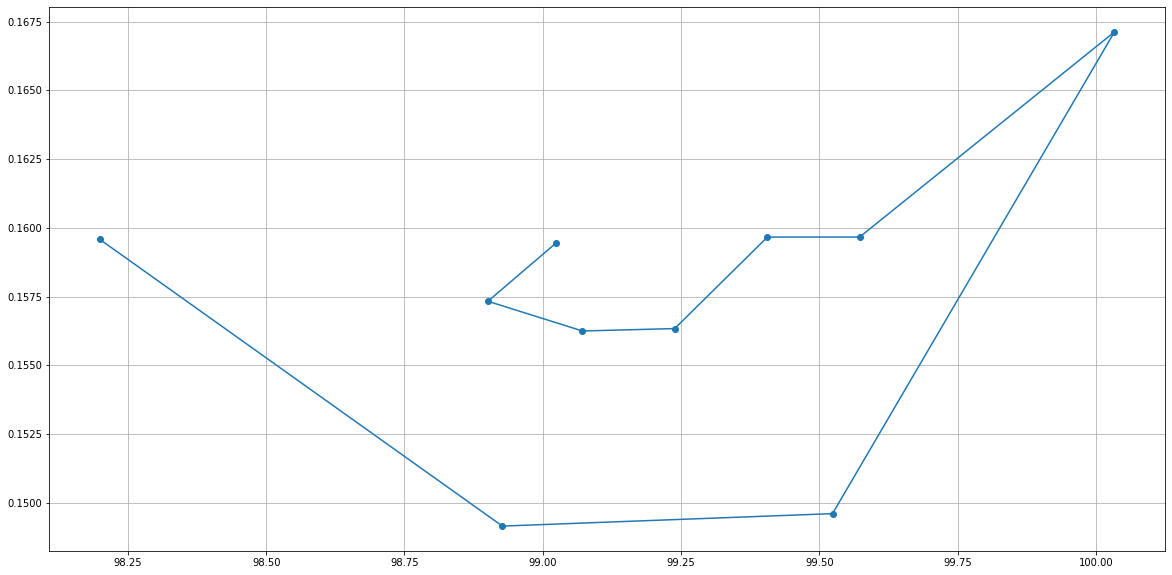

In [51]:
fig, ax = plt.subplots(1,1, figsize=(20,10), sharex=False)
ax.plot(x ,y,'o-')
ax.grid(which='both')

In [31]:
import pandas as pd

In [54]:
tmp = np.vstack([x,y]).T
df = pd.DataFrame(tmp, columns=['rel_dens','e_e'])

In [58]:
df['conf'] = ['x','y','z','e','f','g','h','i','j','k']
df['tech'] = ['two','two','two','one','one','one','one','one','one','one']

In [59]:
df

rel_dens       e_e conf tech
0   98.199346  0.159577    x  two
1   98.927015  0.149153    y  two
2   99.523965  0.149606    z  two
3  100.033769  0.167124    e  one
4   99.572985  0.159664    f  one
5   99.406318  0.159664    g  one
6   99.238562  0.156336    h  one
7   99.071895  0.156248    i  one
8   98.900871  0.157328    j  one
9   99.023965  0.159445    k  one

In [60]:
df.to_csv('fig1.csv')